In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### Reading in csv data file and creating data frame

In [4]:
col_names = ['Country', 'Gender', 'Age']

In [5]:
sociodemographics = pd.read_csv(r"C:\Users\Alex\Desktop\Research\RotaryDuringCovid19Survey\plots\sql server results\sociodemographics.csv", names=col_names)

In [6]:
sociodemographics['Frequency'] = sociodemographics.index

In [7]:
sociodemographics.rename_axis(index='Index')

,Country,Gender,Age,Frequency
Index,,,,
0,Scotland,Male,80.0,0
1,Scotland,Male,78.0,1
2,Scotland,Female,54.0,2
3,Scotland,Male,61.0,3
4,Scotland,Male,69.0,4
...,...,...,...,...
876,England,Male,74.0,876
877,England,Male,74.0,877
878,Scotland,Female,79.0,878


### Creating and recoding AgeR

In [8]:
sociodemographics['AgeR'] = sociodemographics['Age']

In [9]:
sociodemographics['AgeR'] = sociodemographics['AgeR'].mask((sociodemographics['AgeR'] >= 18) & (sociodemographics['AgeR'] < 50), 1) \
    .mask((sociodemographics['AgeR'] >= 50) & (sociodemographics['AgeR'] < 65), 2) \
    .mask((sociodemographics['AgeR'] >= 65) & (sociodemographics['AgeR'] < 80), 3) \
    .mask(sociodemographics['AgeR'] >= 80, 4)

In [10]:
sociodemographics.dtypes

Country       object
Gender        object
Age          float64
Frequency      int64
AgeR         float64
dtype: object

In [11]:
sociodemographics['Country'] = sociodemographics['Country'].astype('str')

In [12]:
sociodemographics['Gender'] = sociodemographics['Gender'].astype('str')

In [13]:
sociodemographics['AgeR'] = sociodemographics['AgeR'].astype('str')

In [14]:
sociodemographics.dtypes

Country       object
Gender        object
Age          float64
Frequency      int64
AgeR          object
dtype: object

In [15]:
sociodemographics.head()

,Country,Gender,Age,Frequency,AgeR
0,Scotland,Male,80.0,0,4.0
1,Scotland,Male,78.0,1,3.0
2,Scotland,Female,54.0,2,2.0
3,Scotland,Male,61.0,3,2.0
4,Scotland,Male,69.0,4,3.0


In [16]:
sociodemographics = sociodemographics.replace({'AgeR': {'1.0': '18-49', '2.0': '50-64', '3.0': '65-79', '4.0': '80+'}})

In [17]:
sociodemographics.head()

,Country,Gender,Age,Frequency,AgeR
0,Scotland,Male,80.0,0,80+
1,Scotland,Male,78.0,1,65-79
2,Scotland,Female,54.0,2,50-64
3,Scotland,Male,61.0,3,50-64
4,Scotland,Male,69.0,4,65-79


### Calculating frequencies by country

In [18]:
groupedfreq_country = sociodemographics.groupby('Country')['Frequency'].nunique()

In [19]:
groupedfreq_country

Country
England             636
Northern Ireland     14
Scotland            187
Wales                44
Name: Frequency, dtype: int64

In [20]:
df_groupedfreq_country = pd.DataFrame(groupedfreq_country)

In [21]:
df_groupedfreq_country

,Frequency
Country,
England,636
Northern Ireland,14
Scotland,187
Wales,44


In [22]:
df_groupedfreq_country['Country'] = df_groupedfreq_country.index

In [23]:
df_groupedfreq_country.rename_axis(index='Index')

,Frequency,Country
Index,,
England,636,England
Northern Ireland,14,Northern Ireland
Scotland,187,Scotland
Wales,44,Wales


### Calculating frequencies by gender

In [24]:
groupedfreq_gender = sociodemographics.groupby('Gender')['Frequency'].nunique()

In [25]:
groupedfreq_gender

Gender
Female    192
Male      685
Other:      3
nan         1
Name: Frequency, dtype: int64

In [26]:
df_groupedfreq_gender = pd.DataFrame(groupedfreq_gender)

In [27]:
df_groupedfreq_gender

,Frequency
Gender,
Female,192
Male,685
Other:,3
nan,1


In [28]:
df_groupedfreq_gender['Gender'] = df_groupedfreq_gender.index

In [29]:
df_groupedfreq_gender.rename_axis(index='Index')

,Frequency,Gender
Index,,
Female,192,Female
Male,685,Male
Other:,3,Other:
nan,1,nan


### Calculating frequencies by age

In [30]:
groupedfreq_age = sociodemographics.groupby('AgeR')['Frequency'].nunique()

In [31]:
groupedfreq_age

AgeR
18-49     20
50-64    154
65-79    613
80+       92
nan        2
Name: Frequency, dtype: int64

In [32]:
df_groupedfreq_age = pd.DataFrame(groupedfreq_age)

In [33]:
df_groupedfreq_age

,Frequency
AgeR,
18-49,20
50-64,154
65-79,613
80+,92
nan,2


In [34]:
df_groupedfreq_age['AgeR'] = df_groupedfreq_age.index

In [35]:
df_groupedfreq_age.rename_axis(index='Index')

,Frequency,AgeR
Index,,
18-49,20,18-49
50-64,154,50-64
65-79,613,65-79
80+,92,80+
nan,2,nan


#### Calculating Frequencies by Gender and Age

In [36]:
sociodemographics_men = sociodemographics[(sociodemographics['Gender']=='Male')]

In [37]:
sociodemographics_women = sociodemographics[(sociodemographics['Gender']=='Female')]

In [38]:
groupedfreq_men_byage = sociodemographics_men.groupby('AgeR')['Frequency'].nunique()

In [39]:
groupedfreq_women_byage = sociodemographics_women.groupby('AgeR')['Frequency'].nunique()

In [40]:
groupedfreq_men_byage

AgeR
18-49     12
50-64     99
65-79    484
80+       88
nan        2
Name: Frequency, dtype: int64

In [41]:
groupedfreq_women_byage

AgeR
18-49      8
50-64     55
65-79    125
80+        4
Name: Frequency, dtype: int64

In [42]:
df_groupedfreq_men_byage = pd.DataFrame(groupedfreq_men_byage)

In [43]:
df_groupedfreq_women_byage = pd.DataFrame(groupedfreq_women_byage)

In [44]:
df_groupedfreq_men_byage

,Frequency
AgeR,
18-49,12
50-64,99
65-79,484
80+,88
nan,2


In [45]:
df_groupedfreq_women_byage

,Frequency
AgeR,
18-49,8
50-64,55
65-79,125
80+,4


In [46]:
df_groupedfreq_men_byage['AgeR'] = df_groupedfreq_men_byage.index

In [47]:
df_groupedfreq_women_byage['AgeR'] = df_groupedfreq_women_byage.index

In [48]:
df_groupedfreq_men_byage.rename_axis(index='Index')

,Frequency,AgeR
Index,,
18-49,12,18-49
50-64,99,50-64
65-79,484,65-79
80+,88,80+
nan,2,nan


In [49]:
df_groupedfreq_women_byage.rename_axis(index='Index')

,Frequency,AgeR
Index,,
18-49,8,18-49
50-64,55,50-64
65-79,125,65-79
80+,4,80+


### Number of Rotarians by Country (n=881)

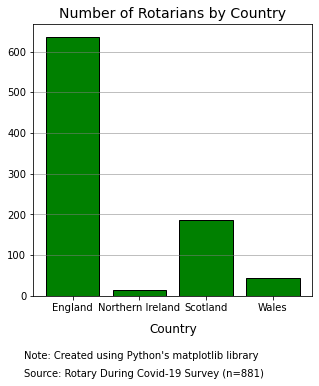

In [50]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(df_groupedfreq_country['Country'], df_groupedfreq_country['Frequency'], edgecolor='black', facecolor='green', width=[.8, .8, .8, .8])
ax.yaxis.grid(linewidth=1, color='grey', alpha=.5)
plt.xlabel('Country', fontdict={'size': 12, \
                                    'weight': 'normal'}, \
           labelpad=10)
plt.title('Number of Rotarians by Country', fontdict={'size': 14})
plt.figtext(.1, -.05, "Note: Created using Python's matplotlib library")
plt.figtext(.1, -.1, "Source: Rotary During Covid-19 Survey (n=881)")
plt.savefig(r'C:\Users\Alex\Desktop\Research\RotaryDuringCovid19Survey\plots\png_files\bycountry.png', bbox_inches="tight")
plt.show()

### Number of Rotarians by Gender (n=881)

In [51]:
df_groupedfreq_gender = df_groupedfreq_gender[(df_groupedfreq_gender['Gender']=='Male') | (df_groupedfreq_gender['Gender']=='Female')]

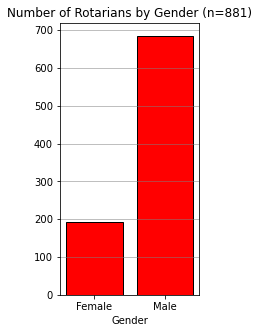

In [52]:
fig, ax = plt.subplots(figsize=(2.5,5))
ax.bar(df_groupedfreq_gender['Gender'], df_groupedfreq_gender['Frequency'], edgecolor='black', facecolor='red', width=[.8, .8])
ax.yaxis.grid(linewidth=1, color='grey', alpha=.5)
plt.xlabel('Gender')
plt.title('Number of Rotarians by Gender (n=881)')
plt.savefig(r'C:\Users\Alex\Desktop\Research\RotaryDuringCovid19Survey\plots\png_files\bygender.png')
plt.show()

### Number of Rotarians by Age (n=881)

In [53]:
df_groupedfreq_age = df_groupedfreq_age[(df_groupedfreq_age['AgeR']=='18-49') | (df_groupedfreq_age['AgeR']=='50-64') | \
                                        (df_groupedfreq_age['AgeR']=='65-79') | (df_groupedfreq_age['AgeR']=='80+')]

In [54]:
df_groupedfreq_age

,Frequency,AgeR
AgeR,,
18-49,20,18-49
50-64,154,50-64
65-79,613,65-79
80+,92,80+


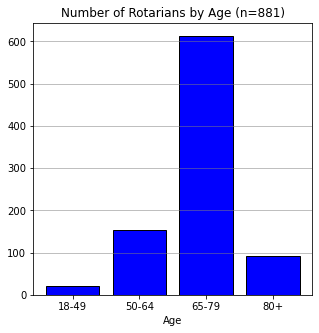

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(df_groupedfreq_age['AgeR'], df_groupedfreq_age['Frequency'], edgecolor='black', facecolor='blue', width=[.8, .8, .8, .8])
ax.yaxis.grid(linewidth=1, color='grey', alpha=.5)
plt.xlabel('Age')
plt.title('Number of Rotarians by Age (n=881)')
plt.savefig(r'C:\Users\Alex\Desktop\Research\RotaryDuringCovid19Survey\plots\png_files\byage.png')
plt.show()

### Stacked Bar Plot by Age and Gender (n=881)

In [56]:
df_groupedfreq_men_byage = df_groupedfreq_men_byage[(df_groupedfreq_men_byage['AgeR'] =='18-49') | (df_groupedfreq_men_byage['AgeR'] =='50-64') | \
                                                    (df_groupedfreq_men_byage['AgeR'] =='65-79') | (df_groupedfreq_men_byage['AgeR'] =='80+')]

In [57]:
df_groupedfreq_women_byage = df_groupedfreq_women_byage[(df_groupedfreq_women_byage['AgeR'] =='18-49') | (df_groupedfreq_women_byage['AgeR'] =='50-64') | \
                                                    (df_groupedfreq_women_byage['AgeR'] =='65-79') | (df_groupedfreq_women_byage['AgeR'] =='80+')]

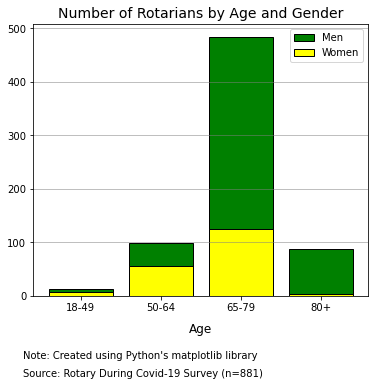

In [58]:
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(df_groupedfreq_men_byage['AgeR'], df_groupedfreq_men_byage['Frequency'], edgecolor='black', facecolor='green', label='Men', width=[.8, .8, .8, .8])
ax.bar(df_groupedfreq_women_byage['AgeR'], df_groupedfreq_women_byage['Frequency'], edgecolor='black', facecolor='yellow', label='Women', width=[.8, .8, .8, .8])
ax.yaxis.grid(linewidth=1, color='grey', alpha=.5)
plt.xlabel('Age', fontdict={'size': 12, \
                                    'weight': 'normal'}, \
           labelpad=10)
plt.figtext(.1, -.05, "Note: Created using Python's matplotlib library")
plt.figtext(.1, -.1, "Source: Rotary During Covid-19 Survey (n=881)")
plt.title('Number of Rotarians by Age and Gender', fontdict={'size': 14})
ax.legend()
plt.savefig(r'C:\Users\Alex\Desktop\Research\RotaryDuringCovid19Survey\plots\png_files\byageandgender.png', bbox_inches="tight")
plt.show()